in this i have consider acceleration =0 or constant acc. as kalmann filter depends on both process and measurement, measurement takes care of velocity and position is taken care by vt. in process v will always remain constant which is wrong to assume , but this is to show how much it can deviate and how much it depends on kalman gain. apart from that i have slected noise according to ratios and as we can see in final p vs t graph, velocity p is always less than 2 which make sense as velocity is btw 6 to -6,and as p is decreasing throughout this shows that model is doing well as it is approaching to true value.

apart from that noise in position is little low according to me but i tried to change but graphs somewhat remains the same so have decided to go with this.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_table('kalmann.txt',sep=',')
df=df.reset_index()
df.columns=['Px','Py','Vx','Vy']
df.head()
df['t']=df.index+1
df.head()
df.describe()



,Px,Py,Vx,Vy,t
count,359.000000,359.000000,359.000000,359.000000,359.000000
mean,-1.330285,-0.046796,-0.006068,-0.030178,180.000000
std,242.431029,211.765838,4.344665,3.739710,103.778611
min,-373.434646,-284.507450,-5.488994,-6.792274,1.000000
25%,-220.787116,-220.471423,-4.788637,-2.821855,90.500000
50%,-0.669666,0.589565,-0.099070,0.002208,180.000000
75%,220.434248,223.502353,4.786486,2.804366,269.500000
max,377.056300,286.589394,5.296606,6.640138,359.000000


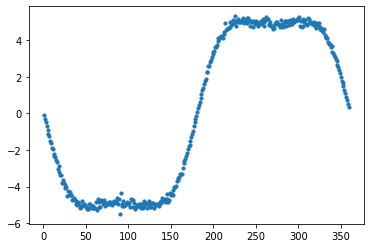

In [3]:
plt.scatter(df['t'],df['Vx'],s=10)

  

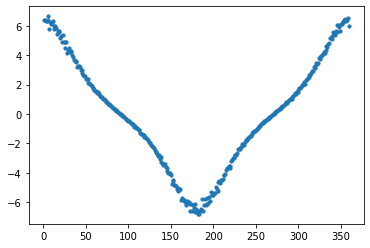

In [4]:
plt.scatter(df['t'],df['Vy'],s=10)

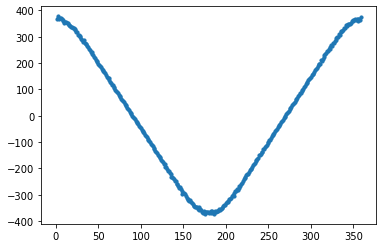

In [5]:
plt.scatter(df['t'],df['Px'],s=10)

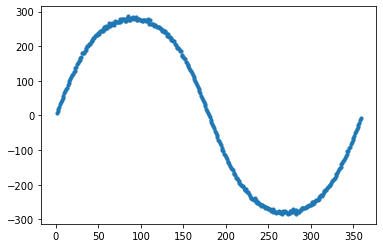

In [6]:
plt.scatter(df['t'],df['Py'],s=10)

In [7]:
#process error
#i have taken process error of position higher than error of velocities as velocities are small and can be affected with large eror
#nevertheless it depends on accuracy of sensors whose data isnt given

P=np.array([[10,0,0,0],[0,10,0,0],[0,0,.1,0],[0,0,0,.1]])
print(P)

[[10.   0.   0.   0. ]
 [ 0.  10.   0.   0. ]
 [ 0.   0.   0.1  0. ]
 [ 0.   0.   0.   0.1]]


In [8]:
A=np.array([[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]])
A

array([[1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [9]:
B=np.array([[0.5,0],[0,0.5],[1,0],[0,1]])
B

array([[0.5, 0. ],
       [0. , 0.5],
       [1. , 0. ],
       [0. , 1. ]])

In [10]:
R=np.array([[49,0,0,0],[0,49,0,0],[0,0,0.81,0],[0,0,0,0.81]])

In [11]:
H=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
#measuring matix, as we r measuring all the things it is a unity matrix

In [12]:
df.Px.std()

242.4310292169624

In [13]:
pred=df.copy()
pred['p1']=pred.index+10
pred['p2']=pred.index+10
pred['p3']=pred.index+10
pred['p4']=pred.index+10




pred.head()


,Px,Py,Vx,Vy,t,p1,p2,p3,p4
0,368.189316,6.596611,-0.099070,6.361599,1,10,10,10,10
1,369.507932,12.687990,-0.298079,6.396538,2,11,11,11,11
2,377.056300,19.793198,-0.498540,6.339847,3,12,12,12,12
3,365.687485,25.654750,-0.695548,6.348781,4,13,13,13,13
4,370.055447,32.080984,-0.900690,6.373027,5,14,14,14,14


In [14]:
pred.index

RangeIndex(start=0, stop=359, step=1)

In [15]:
Xk=np.array([[df.loc[1.0,'Px']],[df.loc[1.0,'Py']],[df.loc[1.0,'Vx']],[df.loc[1.0,'Vy']]])
Xj=np.array([[pred.loc[0,'Px']],[pred.loc[0,'Py']],[pred.loc[0,'Vx']],[pred.loc[0,'Vy']]])
uk=np.array([[0],[0]])
Xkp=A@Xj+B@uk
Pj=np.array([[pred.loc[0,'p1'],0,0,0],[0,pred.loc[0,'p2'],0,0],[0,0,pred.loc[0,'p3'],0],[0,0,0,pred.loc[0,'p4']]])
Pk=A@Pj@A.transpose()
S=H@Pk@H.transpose()+R
K=Pk@H@np.linalg.pinv(S)
Ab=Xkp+K@(Xk-H@Xkp)
print(Ab)
Pk=(np.identity(4)-K@H)@Pk
pred.loc[1.0,'Px']=Ab[0,0]
pred.loc[1.0,'Py']=Ab[1,0]
pred.loc[1.0,'Vx']=Ab[2,0]
pred.loc[1.0,'Vy']=Ab[3,0]

Pk=(np.identity(4)-K@H)@Pk
pred.loc[1.0,'p1']=Pk[0,0]
pred.loc[1.0,'p2']=Pk[1,1]
pred.loc[1.0,'p3']=Pk[2,2]
pred.loc[1.0,'p4']=Pk[3,3]
pred.head()




[[ 3.68194320e+02]
 [ 1.29361018e+01]
 [-2.63079380e-01]
 [ 6.39012622e+00]]


,Px,Py,Vx,Vy,t,p1,p2,p3,p4
0,368.189316,6.596611,-0.099070,6.361599,1,10.00000,10.00000,10.000000,10.000000
1,368.194320,12.936102,-0.263079,6.390126,2,6.76329,6.76329,0.056319,0.056319
2,377.056300,19.793198,-0.498540,6.339847,3,12.00000,12.00000,12.000000,12.000000
3,365.687485,25.654750,-0.695548,6.348781,4,13.00000,13.00000,13.000000,13.000000
4,370.055447,32.080984,-0.900690,6.373027,5,14.00000,14.00000,14.000000,14.000000


In [16]:
for i in range(2,359):
  i=i/1.0
  Xk=np.array([[df.loc[i,'Px']],[df.loc[i,'Py']],[df.loc[i,'Vx']],[df.loc[i,'Vy']]])
  Xj=np.array([[pred.loc[i-1,'Px']],[pred.loc[i-1,'Py']],[pred.loc[i-1,'Vx']],[pred.loc[i-1,'Vy']]])
  uk=np.array([[0],[0]])
  Xkp=A@Xj+B@uk
  Pj=np.array([[pred.loc[i-1,'p1'],0,0,0],[0,pred.loc[i-1,'p2'],0,0],[0,0,pred.loc[i-1,'p3'],0],[0,0,0,pred.loc[i-1,'p4']]])
  Pk=A@Pj@A.transpose()
  S=H@Pk@H.transpose()+R
  K=Pk@H@np.linalg.pinv(S)
  Ab=Xkp+K@(Xk-H@Xkp)
  pred.loc[i,'Px']=[Ab[0,0]]
  pred.loc[i,'Py']=[Ab[1,0]]
  pred.loc[i,'Vx']=[Ab[2,0]]
  pred.loc[i,'Vy']=[Ab[3,0]]
  Pk=(np.identity(4)-K@H)@Pk
  pred.loc[i,'p1']=Pk[0,0]
  pred.loc[i,'p2']=Pk[1,1]
  pred.loc[i,'p3']=Pk[2,2]
  pred.loc[i,'p4']=Pk[3,3]




  


  

  

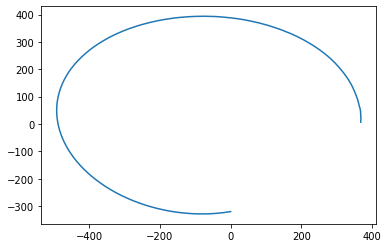

In [17]:

plt.plot(pred.Px,pred.Py)



In [ ]:
pred.head()

,Px,Py,Vx,Vy,t,p1,p2,p3,p4
0,368.189316,6.596611,-0.099070,6.361599,1,10.000000,10.000000,10.000000,10.000000
1,368.194320,12.936102,-0.263079,6.390126,2,6.763290,6.763290,0.056319,0.056319
2,369.032107,19.380383,-0.269763,6.387301,3,5.983620,5.983620,0.052608,0.052608
3,368.402140,25.753212,-0.298468,6.384853,4,5.371648,5.371648,0.049356,0.049356
4,368.266858,32.131769,-0.331357,6.384125,5,4.878706,4.878706,0.046481,0.046481


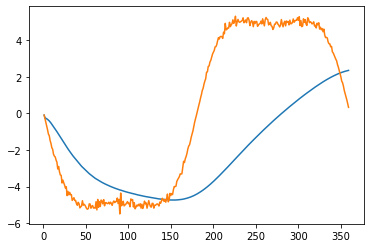

In [ ]:
plt.plot(pred.t,pred.Vx)
plt.plot(df.t,df.Vx)

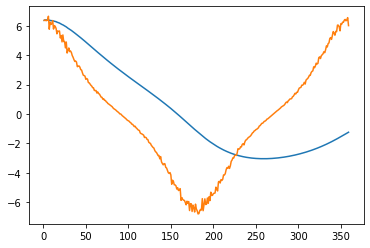

In [ ]:
plt.plot(pred.t,pred.Vy)
plt.plot(df.t,df.Vy)

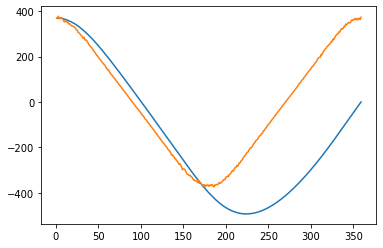

In [ ]:
plt.plot(pred.t,pred.Px)
plt.plot(df.t,df.Px)

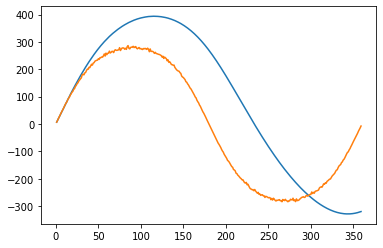

In [ ]:
plt.plot(pred.t,pred.Py)
plt.plot(df.t,df.Py)

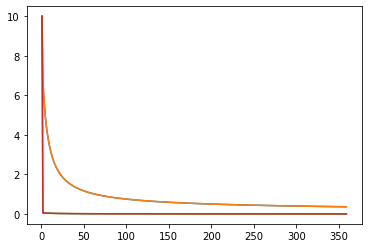

In [ ]:
plt.plot(pred.t,pred.p1)
plt.plot(pred.t,pred.p2)
plt.plot(pred.t,pred.p3)
plt.plot(pred.t,pred.p4)



In [ ]:
pred.to_csv('kalwithouta.csv')